# TASK 1

I am Rohit Nagotkar and this is my implementation of QOSF screening task 1

## Objectives

*   Implement a Quantum circuit of L layers with two main blocks 'odd' and 'even'.
*  Rx is used in odd block and even block consists of Rz and Cz gates.
*  We have to calculate the minimum value of the distance between Ψ(θ)(which is obtained from the circuit) and Φ (which is a random vector of 4 qubits), with a certain combination of "theta(θ)" parameters.
*  We have to analyze how the number of layers affects the minimum distance.




# Installing Dependencies

In [1]:
!pip install qiskit -q --upgrade

import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

In [2]:
!pip install pennylane --upgrade

Requirement already up-to-date: pennylane in /usr/local/lib/python3.6/dist-packages (0.11.0)


In [3]:
!pip install pennylane-qiskit

In [4]:
!pip install autograd tensorflow>=1.13.2

# Importing Libraries

In [5]:
import pennylane as qml
from math import sqrt
from pennylane import numpy as np
qml.about()

Name: PennyLane
Version: 0.11.0
Summary: PennyLane is a Python quantum machine learning library by Xanadu Inc.
Home-page: https://github.com/XanaduAI/pennylane
Author: None
Author-email: None
License: Apache License 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: semantic-version, networkx, autograd, scipy, toml, numpy, appdirs
Required-by: PennyLane-qiskit
Platform info:           Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
Python version:          3.6.9
Numpy version:           1.18.5
Scipy version:           1.4.1
Installed devices:
- default.gaussian (PennyLane-0.11.0)
- default.qubit (PennyLane-0.11.0)
- default.qubit.autograd (PennyLane-0.11.0)
- default.qubit.tf (PennyLane-0.11.0)
- default.tensor (PennyLane-0.11.0)
- default.tensor.tf (PennyLane-0.11.0)
- qiskit.aer (PennyLane-qiskit-0.11.0)
- qiskit.basicaer (PennyLane-qiskit-0.11.0)
- qiskit.ibmq (PennyLane-qiskit-0.11.0)


In [23]:
import qiskit
from qiskit import QuantumCircuit, execute, Aer
import math
from qiskit.quantum_info import random_statevector
from qiskit.visualization import plot_histogram,plot_bloch_multivector
import numpy as np_c
import random

#Global Variable

In [7]:
theta_vec = []


# Get list of theta values for every block


In [10]:

def get_theta(size=4):
  return [round(random.uniform(0,2*np_c.pi),6) for i in range(size)]
   

# Main Circuit Builder funcutons

In [12]:
global Lg
def set_L(l):
  #Set the L layer for Qnode below
  global Lg
  Lg = l

dev1 = qml.device("default.qubit", wires=4)
@qml.qnode(dev1)
def circuit(params):
  global Lg
  for j in range(Lg): #To iterate for L layers
    #Odd block
    for i in range(4): 
      qml.RX(params[i+(j*8)],wires = i)
    #Even Block
    for i in range(4):
      qml.RZ(params[i+4+(j*8)],wires = i)
    qml.CZ(wires = [0,1])
    qml.CZ(wires = [0,2])
    qml.CZ(wires = [0,3])
    qml.CZ(wires = [1,2])
    qml.CZ(wires = [1,3])
    qml.CZ(wires = [2,3])
  return qml.expval(qml.PauliZ(0)),qml.expval(qml.PauliZ(1)),qml.expval(qml.PauliZ(2)),qml.expval(qml.PauliZ(3))


# Input No. of layers and build circuits from 1-L

In [13]:
#To check if L layer circuits are formed

L = int(input("enter number of layers > "))
exp_list = []
temp = L
theta_vec = []
l = get_theta(8*(L))
for k in l :
  theta_vec.append(k)
while(temp):
  set_L(temp)
  exp_list.append(circuit(theta_vec))
  temp-=1

enter number of layers3
24 l


# Observe the L<sup>th</sup> layer circuit 

In [14]:
set_L(L)
print(type(circuit(theta_vec)))
print(circuit.draw())
  

<class 'numpy.ndarray'>
 0: ──RX(0.912)──RZ(4.753)──╭C──╭C──────╭C───RX(3.555)───RZ(2.887)─────────────╭C──────────╭C──────╭C───RX(5.001)───RZ(5.751)─────────────╭C──────────╭C──────╭C──────────┤ ⟨Z⟩ 
 1: ──RX(3.272)──RZ(1.433)──╰Z──│───╭C──│───╭C───────────RX(3.886)──RZ(4.209)──╰Z──────────│───╭C──│───╭C───────────RX(3.511)──RZ(0.025)──╰Z──────────│───╭C──│───╭C──────┤ ⟨Z⟩ 
 2: ──RX(2.067)──RZ(5.144)──────╰Z──╰Z──│───│───────────╭C──────────RX(1.332)───RZ(5.819)──╰Z──╰Z──│───│───────────╭C──────────RX(4.585)───RZ(0.893)──╰Z──╰Z──│───│───╭C──┤ ⟨Z⟩ 
 3: ──RX(2.261)──RZ(4.001)──────────────╰Z──╰Z──────────╰Z──────────RX(0.259)───RZ(4.579)──────────╰Z──╰Z──────────╰Z──────────RX(5.569)───RZ(5.905)──────────╰Z──╰Z──╰Z──┤ ⟨Z⟩ 



# Creating a Random Φ vector of 4 qubits

In [43]:
phi_vec = np.random.normal(size = 4)

# Cost function which has to be minimized

In [44]:
def cost(params):
  psi_theta = circuit(params)
  # print(psi_theta)
  state = random_statevector(4) 
  phi = phi_vec#np.array([0 , 0.3, 0.5, 0])#phi_circuit()
  # print(phi)
  return np.linalg.norm((psi_theta - phi),ord=2) 


# Trial run of optimizing the L<sup>th</sup> layer
 

In [45]:
steps = 200
init_params = np.array(theta_vec)

qng_cost = []
opt =  qml.GradientDescentOptimizer(0.01)

set_L(L)
theta = init_params
# print(theta1,theta2)
print(theta)
for i in range(steps):
    theta = opt.step(cost,theta)
    qng_cost.append(cost(theta))
    if (i + 1) % 5 == 0:
      print("Cost after step {:5d}: {: .7f}".format(i + 1, cost(theta)))

[0.911779 3.271538 2.067456 2.261148 4.752786 1.433119 5.143918 4.000567
 3.554965 3.885521 1.332312 0.259022 2.887393 4.209165 5.819231 4.578963
 5.000819 3.511155 4.584591 5.56912  5.750961 0.025479 0.892644 5.905438]
Cost after step     5:  1.0055141
Cost after step    10:  0.9643436
Cost after step    15:  0.9239394
Cost after step    20:  0.8844663
Cost after step    25:  0.8460612
Cost after step    30:  0.8088324
Cost after step    35:  0.7728599
Cost after step    40:  0.7381970
Cost after step    45:  0.7048722
Cost after step    50:  0.6728928
Cost after step    55:  0.6422476
Cost after step    60:  0.6129102
Cost after step    65:  0.5848423
Cost after step    70:  0.5579967
Cost after step    75:  0.5323191
Cost after step    80:  0.5077510
Cost after step    85:  0.4842309
Cost after step    90:  0.4616957
Cost after step    95:  0.4400818
Cost after step   100:  0.4193255


# Plot for Gradient Descent on L<sup>th</sup> layer

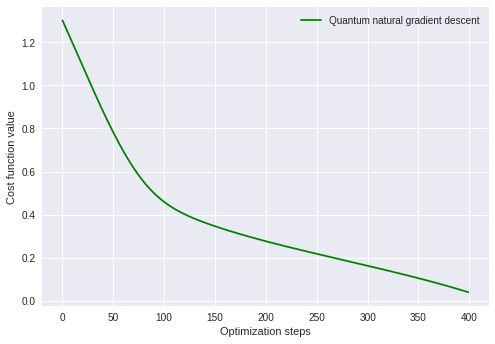

In [17]:
from matplotlib import pyplot as plt

plt.style.use("seaborn")
# plt.plot(gd_cost, "b", label="Vanilla gradient descent")
plt.plot(qng_cost, "g", label="Quantum natural gradient descent")

plt.ylabel("Cost function value")
plt.xlabel("Optimization steps")
plt.legend()
plt.show()

# Running the optimizer for every layer from 1 to L and storing its values

In [46]:
xsteps = 200
main_l = []
opt =  qml.GradientDescentOptimizer(0.01)

for layer in range(1,10):
  print(layer)
  theta = get_theta(8*(layer))
  init_params = np.array(theta_vec)   
  qng_cost = []
  set_L(layer)
  print(theta)
  circuit(theta)
  for i in range(steps):
    theta = opt.step(cost,theta)
    qng_cost.append(cost(theta))
    if (i + 1) % 5 == 0:
      print("Cost after step {:5d}: {: .7f}".format(i + 1, cost(theta)))
  main_l.append(cost(theta))
print(main_l)

1
[3.789808, 2.010472, 1.311771, 0.426119, 2.469643, 3.553914, 3.35422, 5.831125]
Cost after step     5:  1.1079082
Cost after step    10:  1.0877471
Cost after step    15:  1.0674287
Cost after step    20:  1.0469093
Cost after step    25:  1.0261349
Cost after step    30:  1.0050424
Cost after step    35:  0.9835596
Cost after step    40:  0.9616070
Cost after step    45:  0.9390983
Cost after step    50:  0.9159417
Cost after step    55:  0.8920419
Cost after step    60:  0.8673012
Cost after step    65:  0.8416214
Cost after step    70:  0.8149057
Cost after step    75:  0.7870606
Cost after step    80:  0.7579980
Cost after step    85:  0.7276375
Cost after step    90:  0.6959086
Cost after step    95:  0.6627530
Cost after step   100:  0.6281268
Cost after step   105:  0.5920030
Cost after step   110:  0.5543738
Cost after step   115:  0.5152521
Cost after step   120:  0.4746739
Cost after step   125:  0.4326998
Cost after step   130:  0.3894161
Cost after step   135:  0.3449364


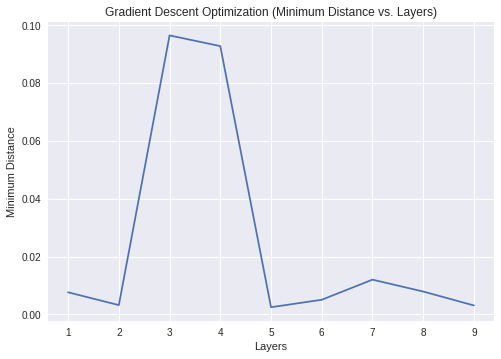

In [48]:
plt.title("Gradient Descent Optimization (Minimum Distance vs. Layers)")
plt.xlabel("Layers")
plt.ylabel("Minimum Distance")
plt.xticks(np.arange(10))
plt.plot([i for i in range(1,len(main_l)+1)],main_l)